In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.datasets import make_circles

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, NuSVC

from sklearn.inspection import permutation_importance

Support Vector Machines 

In [250]:
attributes, labels = load_iris().data, load_iris().target

In [251]:
attributes_train, attributes_test, labels_train, labels_test = train_test_split(attributes, labels, test_size=0.15, stratify=labels)

In [252]:
tree = DecisionTreeClassifier(min_samples_leaf=5)

In [253]:
tree.fit(attributes_train, labels_train)

DecisionTreeClassifier(min_samples_leaf=5)

In [254]:
tree.score(attributes_train, labels_train)

0.968503937007874

In [255]:
tree.score(attributes_test, labels_test)

1.0

In [256]:
tree.feature_importances_

array([0.0044574 , 0.        , 0.05921273, 0.93632987])

In [257]:
print(load_iris().DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [258]:
permutation_importance(tree, attributes_train, labels_train, n_repeats=50)["importances_mean"]

array([0.        , 0.        , 0.10818898, 0.53732283])

In [259]:
tree_new = DecisionTreeClassifier(min_samples_leaf=5)

In [260]:
tree_new.fit(attributes_train[:, 2:], labels_train)

DecisionTreeClassifier(min_samples_leaf=5)

In [261]:
tree_new.feature_importances_

array([0.06081179, 0.93918821])

In [262]:
permutation_importance(tree_new, attributes_train[:, 2:], labels_train, n_repeats=50)["importances_mean"]

array([0.10377953, 0.53259843])

In [263]:
linear_svm = SVC(C=1e9, kernel="linear")

In [264]:
linear_svm.fit(attributes_train, labels_train)

SVC(C=1000000000.0, kernel='linear')

In [265]:
linear_svm.coef_, linear_svm.intercept_

(array([[-4.62431183e-02,  5.21219876e-01, -1.00305282e+00,
         -4.64133178e-01],
        [-7.08301486e-03,  1.78861665e-01, -5.38356945e-01,
         -2.92199466e-01],
        [ 2.37341213e+04,  1.09640954e+04, -3.29815708e+04,
         -3.68142576e+04]]),
 array([1.45268740e+00, 1.50709068e+00, 4.35024519e+04]))

In [266]:
linear_svm.support_vectors_

array([[4.5, 2.3, 1.3, 0.3],
       [4.8, 3.4, 1.9, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [6. , 2.7, 5.1, 1.6],
       [5.9, 3.2, 4.8, 1.8],
       [5.1, 2.5, 3. , 1.1],
       [6.7, 3. , 5. , 1.7],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.8, 5.1, 1.5],
       [6. , 3. , 4.8, 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [7.2, 3. , 5.8, 1.6]])

In [267]:
linear_svm.score(attributes_train, labels_train)

0.9763779527559056

In [268]:
linear_svm.score(attributes_test, labels_test)

1.0

In [269]:
NuSVC()

NuSVC()

In [270]:
x, y = make_circles(n_samples=100, factor=0.5, noise=0.2)

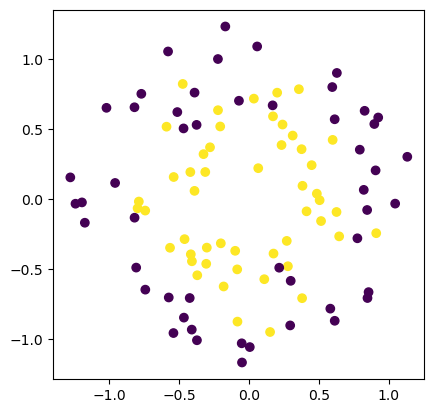

In [271]:
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.gca().set_aspect("equal")
plt.show()

In [272]:
circles_linear_svm = SVC(C=1000, kernel="linear")

In [273]:
circles_linear_svm.fit(x, y)

SVC(C=1000, kernel='linear')

In [274]:
circles_linear_svm.score(x, y)

0.53

In [275]:
circles_gaussian_svm = SVC(C=10000, kernel="rbf", gamma="scale")

In [276]:
circles_gaussian_svm.fit(x, y)

SVC(C=10000)

In [277]:
circles_gaussian_svm.score(x, y)

0.93

In [279]:
param_grid = {
    "kernel": ["rbf"],
    "C": [0.01, 0.1, 2, 5, 15],
    "gamma": ["scale", 0.2, 0.5, 1, 17]
}

GridSearchCV(SVC(), param_grid)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 2, 5, 15],
                         'gamma': ['scale', 0.2, 0.5, 1, 17],
                         'kernel': ['rbf']})